In [207]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cufflinks as cf
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

        C:\Users\Lenovo\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Lenovo\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [6]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
len(messages)

5574

In [11]:
messages[5570:]

['ham\tWill Ã¼ b going to esplanade fr home?',
 'ham\tPity, * was in mood for that. So...any other suggestions?',
 "ham\tThe guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
 'ham\tRofl. Its true to its name']

In [14]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['Label', 'Message'])

In [15]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
messages.loc[0,'Message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [20]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [22]:
messages['Length'] = messages['Message'].apply(len)

In [23]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


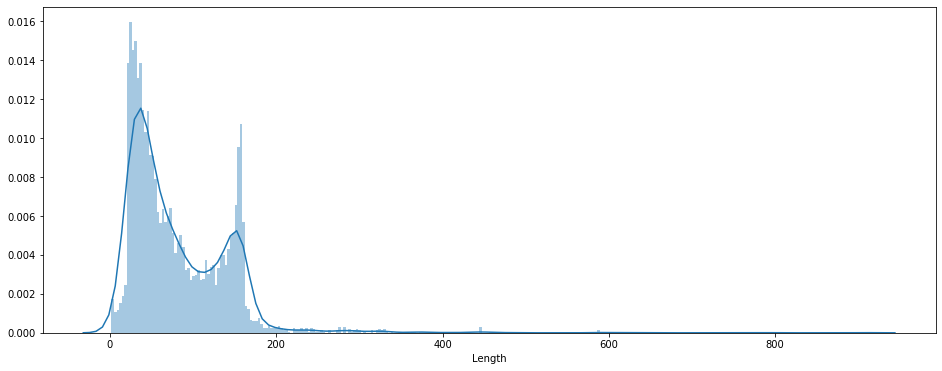

In [33]:
plt.figure(figsize=(16,6))
sns.distplot(bins=300, a=messages['Length'])

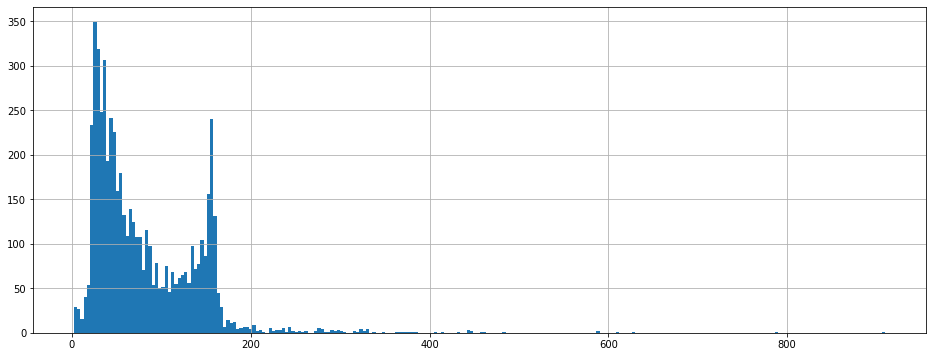

In [36]:
plt.figure(figsize=(16,6))
messages['Length'].hist(bins=250)

In [42]:
messages[messages['Length']>800].loc[1085,'Message']

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000160B1FB1160>,
      dtype=object)

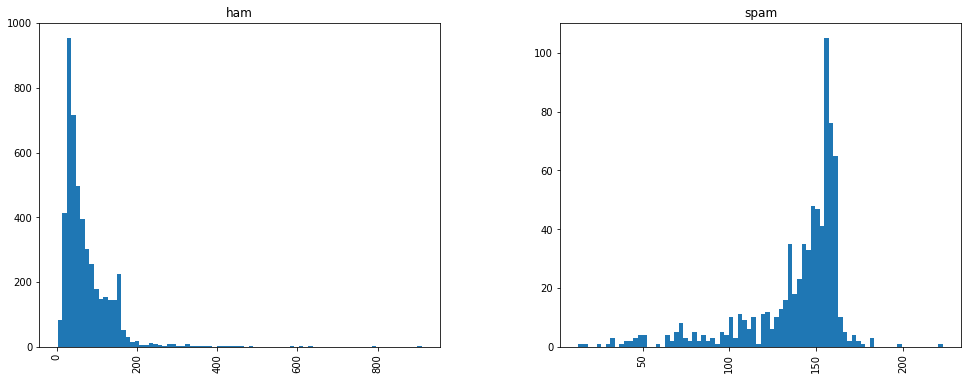

In [43]:
messages.hist(column='Length', by='Label', bins=80, figsize=(16,6))

In [48]:
sample = 'Hi!! We are gonna remove, punctuations from it. Hurrah!!!'

In [52]:
nopunc = [c for c in sample if c not in string.punctuation]

In [53]:
nopunc

['H',
 'i',
 ' ',
 'W',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'g',
 'o',
 'n',
 'n',
 'a',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 'i',
 't',
 ' ',
 'H',
 'u',
 'r',
 'r',
 'a',
 'h']

In [57]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
nopunc = ''.join(nopunc)

In [59]:
nopunc

'Hi We are gonna remove punctuations from it Hurrah'

In [63]:
final_str = [i for i in nopunc.split() if i.lower() not in stopwords.words('english')]

In [64]:
final_str

['Hi', 'gonna', 'remove', 'punctuations', 'Hurrah']

In [68]:
def process_mess(message):
    return [i for i in ''.join([i for i in message if i not in string.punctuation]).split() if i.lower() not in stopwords.words('english')]

In [72]:
messages['Message'].apply(process_mess)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [71]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [130]:
bow_tranformer = CountVectorizer(analyzer=process_mess).fit(messages['Message'])

In [132]:
print(bow_tranformer)

CountVectorizer(analyzer=<function process_mess at 0x00000160B4C4CEA0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [76]:
len(bow_tranformer.vocabulary_)

11425

In [82]:
bow4 = bow_tranformer.transform([messages['Message'][3]])

In [84]:
bow4.shape

(1, 11425)

In [86]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [87]:
bow_tranformer.get_feature_names()[9554]

'say'

In [88]:
messages_bow = bow_tranformer.transform(messages['Message'])

In [89]:
print('Shape of the Sparse matrix: ', messages_bow.shape)

Shape of the Sparse matrix:  (5572, 11425)


In [90]:
messages_bow.nnz

50548

In [91]:
sparsity = (100*(messages_bow.nnz)/(messages_bow.shape[0]*messages_bow.shape[1]))
print('Sparsity: ', sparsity)

Sparsity:  0.07940295412668218


In [93]:
tfidf = TfidfTransformer().fit(messages_bow)

In [94]:
tfidf4 = tfidf.transform(bow4)

In [96]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [100]:
tfidf.idf_[bow_tranformer.vocabulary_['random']]

8.016250875135436

In [103]:
messages_tfidf = tfidf.transform(messages_bow)

In [109]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Label'])

In [115]:
spam_detect_model.predict(bow4)[0]

'ham'

In [118]:
all_predict = spam_detect_model.predict(messages_tfidf)

In [124]:
messages[(all_predict != messages['Label'])]

,Label,Message,Length
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
15,spam,"XXXMobileMovieClub: To use your credit, click ...",149
56,spam,Congrats! 1 year special cinema pass for 2 is ...,161
68,spam,"Did you hear about the new ""Divorce Barbie""? I...",78
139,spam,You'll not rcv any more msgs from the chat svc...,155
147,spam,FreeMsg Why haven't you replied to my text? I'...,159
165,spam,BangBabes Ur order is on the way. U SHOULD rec...,155
191,spam,Are you unique enough? Find out from 30th Augu...,72
227,spam,Will u meet ur dream partner soon? Is ur caree...,137
264,spam,Hey I am really horny want to chat or see me n...,121


In [128]:
all_predict[4]

'ham'

In [129]:
messages['Label'][5]

'spam'

In [170]:
X_train, X_test, y_train, y_test = train_test_split(messages['Message'], messages['Label'], test_size=0.2, random_state=101)

In [200]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_mess)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

In [201]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_mess at 0x00000160B4C4CEA0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [203]:
Predictions = pipeline.predict(X_test)

In [206]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       1.00      0.66      0.79       135

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [208]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_mess)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

Predictions = pipeline.predict(X_test)

print(classification_report(y_test, Predictions))

C:\Users\Lenovo\Anaconda3.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       0.98      0.68      0.80       135

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115



In [209]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_mess)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Predictions = pipeline.predict(X_test)

print(classification_report(y_test, Predictions))

C:\Users\Lenovo\Anaconda3.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       980
        spam       1.00      0.61      0.76       135

    accuracy                           0.95      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.95      0.95      1115

